In [1]:
import pandas as pd
import numpy as np
import os

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
path = os.path.join(os.getcwd(), '../raw_data')

data_prep = pd.read_csv(os.path.join(path, 'x_train_preprocessed.csv'))
data_prep.head(1)

,Unnamed: 0,summary,positives,negatives,advice_to_mgmt,review,summary_length,postives_length,negatives_length,advice_length,...,subjectivity_summary,polarity_summary,subjectivity_positives,polarity_positives,subjectivity_negatives,polarity_negatives,subjectivity_advice_to_mgmt,polarity_advice_to_mgmt,subjectivity_review,polarity_review
0,0,good job considering retail,apple good company period pay average working ...,job movement lateral extremely difficult get p...,NaN,good job considering retail apple good company...,31,118,127,0,...,0.6,0.7,0.666667,0.516667,1.0,-0.5,0.0,0.0,0.72,0.35


In [3]:
data_prep.shape

(36970, 51)

In [4]:
data_prep.positives.isnull().sum()

1

In [5]:
# only consider positive reviews and drop nan values

positives = data_prep.positives.dropna()
positives.shape

(36969,)

In [19]:
positives

0        apple good company period pay average working ...
1                  good pay smart coworkers good insurance
2        intelligent co worker encouraged innovate good...
3        pay competitive look good resume move around i...
4                                 good salary perk benefit
5        great people challenging project fast paced en...
6        great experience advancement understanding uti...
7                            fellow team member great work
8                                   really nothing share v
9        world class benefit smart coworkers food galor...
10                    people technology impact scale money
11                            team work international echo
12                             dynamic fast moving company
13       good salary lot opportunity work different tec...
14       intelligent staff opportunity career developme...
15       easy straight forward job computer system easy...
16                                  great brand add resu

In [6]:
# only consider positive reviews and drop nan values

negatives = data_prep.negatives.dropna()
negatives.shape

(36961,)

In [7]:
def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])

In [9]:
# topic modelling ngram_range

vectorizer = TfidfVectorizer(ngram_range=(3,3)).fit(positives)

data_vectorized = vectorizer.transform(positives)

lda_model = LatentDirichletAllocation(n_components=3).fit(data_vectorized)

print_topics(lda_model, vectorizer)

Topic 0:
[('work life balance', 140.08242486919593), ('good work life', 50.50539281116241), ('good company work', 50.10910279766713), ('life balance good', 30.169872167034676), ('great work life', 29.670307657876485), ('great place work', 27.910943942562493), ('benefit work life', 25.752155664201855), ('good working environment', 23.7987985552197), ('best company work', 23.544101597518836), ('good salary good', 18.07733650325747)]
Topic 1:
[('great company work', 88.21569368117588), ('great place work', 84.97594154066408), ('work life balance', 68.07022683753698), ('great people work', 44.1210297079636), ('best place work', 35.063954760396186), ('lot smart people', 32.79831063116563), ('good pay benefit', 25.287782544698636), ('great people great', 23.809494976156326), ('great pay benefit', 21.48448751303883), ('great benefit good', 20.895189353533528)]
Topic 2:
[('work life balance', 89.42295340562993), ('good place work', 61.335092523975824), ('good work life', 43.878862301816426), (

In [13]:
vectorizer = TfidfVectorizer(max_df=0.8, ngram_range=(3,3)).fit(negatives) # words that appear most (top 20%) left out

data_vectorized = vectorizer.transform(negatives)

lda_model = LatentDirichletAllocation(n_components=3).fit(data_vectorized)

print_topics(lda_model, vectorizer)

Topic 0:
[('work life balance', 148.36771347530794), ('life balance good', 18.231838982006014), ('great place work', 16.848558989572293), ('nothing bad say', 15.976781482030981), ('work long hour', 14.354953434287964), ('long working hour', 13.018409446253276), ('poor work life', 12.98257416158454), ('fast paced environment', 12.610009864081274), ('life balance could', 12.57466218342602), ('long hour lot', 12.41980502765697)]
Topic 1:
[('work life balance', 85.89815350697823), ('long work hour', 13.516452578320893), ('pay could better', 12.458432640738751), ('con working amazon', 8.326078556754432), ('con working apple', 7.939316603558624), ('life balance bad', 7.938914398126913), ('long working hour', 7.587494198812591), ('life balance time', 7.451481567346399), ('get thing done', 6.928757727364428), ('nothing say con', 6.8537502286571454)]
Topic 2:
[('work life balance', 165.52406170134077), ('poor work life', 21.371821513284534), ('none none none', 17.32883724324451), ('long hour wo

In [68]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import string
from nltk import word_tokenize, pos_tag

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/theresasporn/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/theresasporn/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [65]:
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only     the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if   is_noun_adj(pos)]
    return ' '.join(nouns_adj)

In [66]:
data_nouns = pd.DataFrame(negatives.apply(nouns_adj))
data_nouns.shape

(36961, 1)

In [46]:
negatives.head()

0    job movement lateral extremely difficult get p...
1    hr protect company employee careful restricted...
2    promote work life balance word employee get re...
3    work life balance hostile environment reward b...
4    hectic schedule u ill learning cutting technology
Name: negatives, dtype: object

In [18]:
vectorizer = TfidfVectorizer(max_df=0.1).fit(data_nouns.negatives) # words that appear most (top 20%) left out

data_vectorized = vectorizer.transform(data_nouns.negatives)

lda_model = LatentDirichletAllocation(n_components=3).fit(data_vectorized)

print_topics(lda_model, vectorizer)

Topic 0:
[('hard', 397.9315039086063), ('none', 378.4008446928211), ('day', 351.7871387601317), ('retail', 281.44086284305644), ('pressure', 277.07810807438767), ('customer', 271.68343581543013), ('get', 230.4047847899033), ('job', 205.49282734258185), ('competitive', 202.33287134971846), ('shift', 201.84845832478894)]
Topic 1:
[('con', 727.8296107026129), ('good', 458.6857180800283), ('lot', 437.7855299477722), ('manager', 414.1427234544617), ('employee', 399.9364013580441), ('much', 352.50587889068), ('team', 350.3336113719103), ('career', 326.81200498055676), ('politics', 326.0687791730914), ('job', 302.66004316514795)]
Topic 2:
[('balance', 462.38785971363745), ('nothing', 388.5905462372064), ('bad', 287.63228241115564), ('many', 279.23912859933586), ('process', 267.7305274534226), ('big', 265.82298354251645), ('difficult', 246.17164113738303), ('team', 226.87593012159815), ('slow', 211.82800248809528), ('break', 210.5804959179486)]


In [80]:
tokenized = []
for sentence in negatives:
    tokenized.append(word_tokenize(sentence))
    
tokenized

[['job',
  'movement',
  'lateral',
  'extremely',
  'difficult',
  'get',
  'promoted',
  'competing',
  'coworkers',
  'store'],
 ['hr',
  'protect',
  'company',
  'employee',
  'careful',
  'restricted',
  'stock',
  'unit',
  'awarded',
  'exact',
  'number'],
 ['promote',
  'work',
  'life',
  'balance',
  'word',
  'employee',
  'get',
  'recognized',
  'hand',
  'meeting',
  'worked',
  'hour',
  'week',
  'never',
  'took',
  'time'],
 ['work',
  'life',
  'balance',
  'hostile',
  'environment',
  'reward',
  'bully',
  'limited',
  'development',
  'advancement',
  'option',
  'older',
  'employee',
  'manager',
  'check',
  'balance',
  'get',
  'terminated',
  'made',
  'reason',
  'employment',
  'likely',
  'rsus',
  'vest',
  'hr',
  'support',
  'manager',
  'employee'],
 ['hectic', 'schedule', 'u', 'ill', 'learning', 'cutting', 'technology'],
 ['hard',
  'get',
  'often',
  'turn',
  'away',
  'good',
  'people',
  'left',
  'clear',
  'idea',
  'make'],
 ['always', '

In [81]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [82]:
# create id2word
id2word = corpora.Dictionary(tokenized)

# Create Corpus
texts = tokenized

# Creat Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


In [83]:
ldamallet = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=2, id2word=id2word, iterations=100)

In [84]:
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=texts, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.4688382127478212


In [87]:
import pprint 
pp = #+(indent=4)

In [88]:
pp.pprint(ldamallet.show_topics(formatted=False))

[   (   0,
        [   ('work', 0.04324125),
            ('hour', 0.017661657),
            ('time', 0.017499201),
            ('life', 0.014065757),
            ('management', 0.013477578),
            ('get', 0.012647966),
            ('balance', 0.011651481),
            ('long', 0.00996736),
            ('day', 0.008981415),
            ('working', 0.0088751055)]),
    (   1,
        [   ('company', 0.014128655),
            ('people', 0.011352826),
            ('manager', 0.0108420225),
            ('employee', 0.010009327),
            ('get', 0.008634265),
            ('team', 0.0070934985),
            ('management', 0.0066365697),
            ('work', 0.006516138),
            ('job', 0.006348579),
            ('customer', 0.0062668966)])]


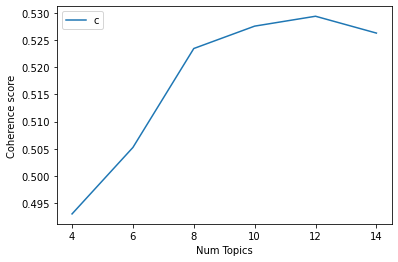

In [89]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=4):
    '''
    Compute coherence for given number of topics

    Parameters:
    
        dictionary : Gensim dictionary
        corpus : Gensim corpus
        texts : List of input texts
        start: minimum number of topics
        limit : Max num of topics
        step: step between topic numbers

    Returns:
    
        model_list : List of LDA topic models
        coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    '''
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, alpha=.91)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


# Running the above function. Can take a long time to run!
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=4, limit=16, step=2)


# Show graph of LDA coherence scores
# ATTEN: parameters here have to match those of you function to display properly!
limit = 16
start = 4
step = 2
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [90]:
optimal_model = model_list[4]
model_topics = optimal_model.show_topics(formatted=False)
pp.pprint(optimal_model.print_topics(num_words=10))

[   (   0,
        '0.022*"company" + 0.020*"career" + 0.020*"need" + 0.018*"role" + '
        '0.015*"much" + 0.013*"business" + 0.012*"change" + 0.012*"work" + '
        '0.011*"large" + 0.009*"organization"'),
    (   1,
        '0.033*"company" + 0.022*"people" + 0.018*"many" + 0.017*"promotion" + '
        '0.015*"manager" + 0.014*"good" + 0.012*"get" + 0.012*"year" + '
        '0.011*"management" + 0.009*"lot"'),
    (   2,
        '0.200*"work" + 0.084*"life" + 0.071*"balance" + 0.022*"sometimes" + '
        '0.012*"company" + 0.011*"hard" + 0.010*"environment" + 0.010*"poor" + '
        '0.009*"lot" + 0.009*"time"'),
    (   3,
        '0.020*"employee" + 0.019*"management" + 0.018*"lot" + 0.016*"work" + '
        '0.014*"high" + 0.013*"time" + 0.012*"get" + 0.010*"nothing" + '
        '0.010*"lack" + 0.010*"pace"'),
    (   4,
        '0.071*"hour" + 0.046*"time" + 0.031*"long" + 0.030*"shift" + '
        '0.028*"day" + 0.018*"break" + 0.016*"work" + 0.015*"schedule" + '
     

In [91]:
import pyLDAvis
import pyLDAvis.gensim

In [92]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, dictionary=optimal_model.id2word)
vis

/Users/theresasporn/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/theresasporn/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.145774 -0.116268       1        1  13.899591
5      0.154568 -0.083260       2        1  12.659319
4      0.198256  0.144645       3        1   8.804421
6     -0.026185 -0.085155       4        1   8.655155
10    -0.095499 -0.046316       5        1   7.940163
1     -0.067168 -0.064006       6        1   7.939316
0     -0.103926 -0.003237       7        1   7.182032
9      0.015336  0.028264       8        1   7.156337
2     -0.041295  0.169242       9        1   6.552840
3     -0.028225  0.019243      10        1   6.497488
11    -0.068931 -0.000075      11        1   6.395619
7     -0.082704  0.036923      12        1   6.317717, topic_info=     Category          Freq         Term         Total  loglift  logprob
33    Default  14095.000000         work  14095.000000  30.0000  30.0000
24    Default   3916.000000         life   3916.000000  29.0000  29.0000
23    Default   4699.000000         hour   4699.000000  28.0000  28.0000
21    Default   3199.000000      balance   3199.000000  27.0000  27.0000
297   Default   4866.000000         team   4866.000000  26.0000  26.0000
141   Default   2564.000000     customer   2564.000000  25.0000  25.0000
510   Default   1791.000000        shift   1791.000000  24.0000  24.0000
139   Default   1604.000000        apple   1604.000000  23.0000  23.0000
171   Default   1606.000000       retail   1606.000000  22.0000  22.0000
492   Default   2802.000000       amazon   2802.000000  21.0000  21.0000
12    Default   7535.000000      company   7535.000000  20.0000  20.0000
326   Default   2848.000000          day   2848.000000  19.0000  19.0000
9     Default   1065.000000        store   1065.000000  18.0000  18.0000
105   Default   1918.000000          con   1918.000000  17.0000  17.0000
29    Default   6886.000000         time   6886.000000  16.0000  16.0000
64    Default   3414.000000         hard   3414.000000  15.0000  15.0000
477   Default   1036.000000        break   1036.000000  14.0000  14.0000
116   Default   2939.000000         long   2939.000000  13.0000  13.0000
69    Default   6528.000000       people   6528.000000  12.0000  12.0000
467   Default   1957.000000       change   1957.000000  11.0000  11.0000
83    Default   1974.000000       career   1974.000000  10.0000  10.0000
120   Default   2558.000000    sometimes   2558.000000   9.0000   9.0000
58    Default    971.000000     schedule    971.000000   8.0000   8.0000
941   Default    808.000000         none    808.000000   7.0000   7.0000
4     Default   6853.000000          get   6853.000000   6.0000   6.0000
314   Default   1364.000000         role   1364.000000   5.0000   5.0000
1157  Default   1233.000000       salary   1233.000000   4.0000   4.0000
88    Default   6465.000000   management   6465.000000   3.0000   3.0000
234   Default   1418.000000    promotion   1418.000000   2.0000   2.0000
1111  Default    812.000000         sale    812.000000   1.0000   1.0000
...       ...           ...          ...           ...      ...      ...
515   Topic12    489.864807      benefit   1063.598877   1.9865  -4.3731
1996  Topic12     68.904099        match     91.691757   2.4761  -6.3345
993   Topic12    102.252357      parking    157.169815   2.3319  -5.9398
137   Topic12    673.465576          pay   2394.940430   1.4931  -4.0548
690   Topic12    464.315002        think   1416.057373   1.6467  -4.4267
699   Topic12    143.843201         base    267.209229   2.1425  -5.5985
221   Topic12    485.228729       growth   1642.440308   1.5425  -4.3826
3516  Topic12     70.788307    cafeteria     96.182976   2.4553  -6.3076
616   Topic12    183.996613        lower    432.750549   1.9066  -5.3523
90    Topic12    314.798126       office   1027.583618   1.5788  -4.8153
1700  Topic12    119.467575      commute    219.940506   2.1515  -5.7842
311   Topic12    430.268707        level   2064.635498   1.193